In [54]:
import branca.colormap as cm
import folium
from glob import glob
from io import StringIO
import holoviews as hv
from holoviews import opts
import numpy as np
import os
import pandas as pd
import panel as pn
import zipfile

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
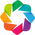

In [55]:
# Initialize HoloViews with Panel backend
hv.extension('bokeh')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
def read_csvs_from_zips(folder_path, names):
    """
    Read all CSV files found within ZIP files in the specified folder.
    
    Args:
        folder_path (str): Path to the folder containing ZIP files
        
    Returns:
        dict: Dictionary with keys as 'zipfile_name/csv_name' and values as pandas DataFrames
    """
    all_dataframes = {}
    columns = [
        'NOME PROVINCIA (ISTAT)', 
        'CODICE NUTS 3 2021', 
        'CODICE PROVINCIA ISTAT (STORICO)', 
        'DENOMINAZIONE CORRENTE', 
        'VALORE', 
        'INDICATORE', 
        "UNITA' DI MISURA", 
        'ANNO DI RIFERIMENTO DEI DATI', 
        'FONTE ORIGINALE'
    ]
    
    # Get all ZIP files in the folder
    zip_files = [f for f in os.listdir(folder_path) if f.endswith('.zip')]
    
    for zip_filename in zip_files:
        zip_path = os.path.join(folder_path, zip_filename)
        
        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                # List all files in the ZIP
                for file_info in zip_ref.filelist:
                    if file_info.filename.endswith('.csv'):
                        # Read the CSV file from the ZIP
                        with zip_ref.open(file_info.filename) as csv_file:
                            # Convert bytes to string
                            csv_content = csv_file.read().decode('utf-8')
                            
                            # Read CSV content into pandas DataFrame
                            df = pd.read_csv(StringIO(csv_content))
                            df = df.dropna(how='all').dropna(how='all', axis=1)
                            df = df.rename(columns=names)
                            for cid in names.values():
                                if cid not in df.columns:
                                    df[cid] = None
                            
                            # Create a key combining ZIP and CSV filename
                            key = f"{zip_filename}/{file_info.filename}"
                            all_dataframes[key] = df[columns]

                            print(f"Successfully read: {key}")
        except Exception as e:
            print(f"Error processing {zip_filename}: {str(e)}")
    
    return all_dataframes

In [5]:
def clean(dataframes: dict):
    for key in dataframes.keys():
        dataframes[key]['ANNO PUBBLICAZIONE'] = os.path.basename(key).split('_')[1][3:]
        if 'ANNO DI RIFERIMENTO DEI DATI' in dataframes[key].columns:
            indices = dataframes[key][pd.isnull(dataframes[key]['ANNO DI RIFERIMENTO DEI DATI'])].index
            dataframes[key].loc[indices, 'ANNO DI RIFERIMENTO DEI DATI'] = dataframes[key].loc[indices, 'ANNO PUBBLICAZIONE']
        else:
            dataframes[key]['ANNO DI RIFERIMENTO DEI DATI'] = dataframes[key]['ANNO PUBBLICAZIONE']

    df = pd.concat([x for x in dataframes.values()])
    for cid in ['INDICATORE', 'ANNO DI RIFERIMENTO DEI DATI']:
        df[cid] = df[cid].astype(str)
        if cid == 'INDICATORE':
            df[cid] = df[cid].apply(lambda x: x.strip().title())
    # df['ANNO DI RIFERIMENTO DEI DATI'] = df['ANNO DI RIFERIMENTO DEI DATI'].astype(int)
    return df

In [6]:
# Filter to keep only true integers
def filter_true_integers(df, column_name):
    # First remove NaN values
    mask = df[column_name].notna()
    
    # Then check if values are integers
    # This will handle both native integers and integer-valued floats
    mask &= df[column_name].apply(lambda x: 
        isinstance(x, (int, np.integer)) or
        (isinstance(x, float) and x.is_integer())
    )
    
    return df[mask]

In [7]:
class ItalianProvincesDashboard:
    def __init__(self, data):
        """Initialize dashboard with the provided dataset."""
        self.data = data
        self.indicators = sorted(data['INDICATORE'].unique())
        
        # Create mapping of indicators to their available years
        self.indicator_years = {
            indicator: sorted(
                data[data['INDICATORE'] == indicator]['ANNO DI RIFERIMENTO DEI DATI'].unique()
            )
            for indicator in self.indicators
        }
        
    def create_bar_chart(self, indicator, year):
        """Create a bar chart showing top 20 provinces for selected indicator and year."""
        # Filter data based on selection
        filtered_data = self.data[
            (self.data['INDICATORE'] == indicator) & 
            (self.data['ANNO DI RIFERIMENTO DEI DATI'] == year)
        ]
        
        if filtered_data.empty:
            return hv.Text(0, 0, 'No data available for the selected combination')
            
        # Sort by value and get top 20 provinces
        filtered_data = filtered_data.nlargest(20, 'VALORE')
        
        # Create bar chart
        bars = hv.Bars(
            filtered_data, 
            kdims=['DENOMINAZIONE CORRENTE'], 
            vdims=['VALORE']
        ).opts(
            title=f'Top 20 Provinces by {indicator} ({year})',
            width=800,
            height=400,
            xrotation=45,
            tools=['hover'],
            color='#2b83ba',
            ylim=(filtered_data['VALORE'].min() * 0.95, 
                  filtered_data['VALORE'].max() * 1.05),  # Add 5% padding
            padding=0.1,  # Add padding around the plot
            show_grid=True,
            responsive=True,
            aspect=2,  # Control aspect ratio
            yformatter='%.1f'  # Format y-axis labels
        )
        
        return bars
    
    def create_time_series(self, indicator, provinces):
        """Create a time series comparison plot for selected provinces."""
        if not provinces:
            return hv.Text(0, 0, 'Please select at least one province')
            
        # Create a color palette for multiple provinces
        colors = ['#d7191c', '#2b83ba', '#1a9850', '#fdae61', '#756bb1', '#636363']
        
        # Initialize an empty overlay for all plots
        overlay = hv.Overlay()
        
        # Collect all values for y-axis scaling
        all_values = []
        
        for idx, province in enumerate(provinces):
            # Filter data based on selection
            filtered_data = self.data[
                (self.data['INDICATORE'] == indicator) & 
                (self.data['DENOMINAZIONE CORRENTE'] == province)
            ]
            
            if filtered_data.empty:
                continue
                
            all_values.extend(filtered_data['VALORE'].values)
            
            # Sort by year
            filtered_data = filtered_data.sort_values('ANNO DI RIFERIMENTO DEI DATI')
            
            color = colors[idx % len(colors)]  # Cycle through colors if more provinces than colors
            
            if len(filtered_data) == 1:
                # If we only have one point, create a scatter plot
                scatter = hv.Scatter(
                    filtered_data, 
                    kdims=['ANNO DI RIFERIMENTO DEI DATI'], 
                    vdims=['VALORE'],
                    label=province
                ).opts(
                    color=color,
                    size=10,
                    tools=['hover']
                )
                overlay *= scatter
            else:
                # Create curve and points for this province
                curve = hv.Curve(
                    filtered_data, 
                    kdims=['ANNO DI RIFERIMENTO DEI DATI'], 
                    vdims=['VALORE'],
                    label=province
                ).opts(
                    color=color,
                    tools=['hover'],
                    line_width=2
                )
                
                points = hv.Scatter(
                    filtered_data, 
                    kdims=['ANNO DI RIFERIMENTO DEI DATI'], 
                    vdims=['VALORE']
                ).opts(
                    color=color,
                    size=8,
                    tools=['hover']
                )
                
                overlay *= (curve * points)
        
        # If no valid data was found for any province
        if not len(overlay):
            return hv.Text(0, 0, 'No data available for the selected combinations')
            
        # Calculate y-axis limits with padding
        if all_values:
            y_min = min(all_values) * 0.95
            y_max = max(all_values) * 1.05
        else:
            y_min, y_max = 0, 1
            
        # Apply common options to the overlay
        overlay = overlay.opts(
            title=f'{indicator} Trends Comparison',
            width=800,
            height=400,
            legend_position='right',
            show_grid=True,
            padding=0.1,
            ylim=(y_min, y_max),
            responsive=True,
            aspect=2,
            yformatter='%.1f',
            xlabel='Year',
            ylabel='Value'
        )
        
        return overlay

    def create_dashboard(self):
        """Create the complete dashboard with all widgets and plots."""
        # Create indicator selector
        indicator_select = pn.widgets.Select(
            name='Indicator',
            options=self.indicators,
            value=self.indicators[0]
        )
        
        # Create dynamic year selector that updates based on indicator
        def get_years(indicator):
            return self.indicator_years[indicator]
            
        year_select = pn.widgets.Select(
            name='Year',
            options=get_years(self.indicators[0]),
            value=get_years(self.indicators[0])[0]
        )
        
        # Create province multi-selector
        province_select = pn.widgets.MultiSelect(
            name='Provinces',
            options=sorted([str(x) for x in self.data['DENOMINAZIONE CORRENTE'].unique()]),
            value=[self.data['DENOMINAZIONE CORRENTE'].iloc[0]],
            size=6  # Show 6 options at once
        )
        
        # Update year options when indicator changes
        def update_years(event):
            years = get_years(event.new)
            year_select.options = years
            year_select.value = years[0]
                
        indicator_select.param.watch(update_years, 'value')

        # Create dynamic plots with proper sizing mode
        @pn.depends(indicator_select.param.value, year_select.param.value)
        def get_bar_chart(indicator, year):
            plot = self.create_bar_chart(indicator, year)
            return pn.pane.HoloViews(plot, sizing_mode='stretch_width')

        @pn.depends(indicator_select.param.value, province_select.param.value)
        def get_time_series(indicator, provinces):
            plot = self.create_time_series(indicator, provinces)
            return pn.pane.HoloViews(plot, sizing_mode='stretch_width')

        # Create dashboard layout with proper sizing modes
        dashboard = pn.Column(
            pn.pane.Markdown('# Italian Provinces Life Quality Dashboard', sizing_mode='stretch_width'),
            pn.Row(
                pn.Column(
                    pn.pane.Markdown('## Controls', sizing_mode='stretch_width'),
                    indicator_select,
                    year_select,
                    province_select,
                    pn.pane.Markdown('---', sizing_mode='stretch_width'),
                    pn.pane.Markdown('### Data Info', sizing_mode='stretch_width'),
                    pn.bind(lambda i, provinces: '\n'.join([
                        f'{p}: {len(self.data[(self.data["INDICATORE"] == i) & (self.data["DENOMINAZIONE CORRENTE"] == p)])} years'
                        for p in provinces
                    ]), indicator_select, province_select),
                    width=300,
                    sizing_mode='fixed'
                ),
                pn.Column(
                    pn.pane.Markdown('## Visualizations', sizing_mode='stretch_width'),
                    get_bar_chart,
                    get_time_series,
                    width=850,
                    sizing_mode='fixed'
                ),
                sizing_mode='stretch_width'
            ),
            sizing_mode='stretch_width'
        )
        
        return dashboard

In [8]:
class ItalianProvincesDashboard2:
    def __init__(self, data):
        """Initialize dashboard with the provided dataset."""
        self.data = data
        self.indicators = sorted(data['INDICATORE'].unique())
        
        # Create mapping of indicators to their available years
        self.indicator_years = {
            indicator: sorted(
                data[data['INDICATORE'] == indicator]['ANNO DI RIFERIMENTO DEI DATI'].unique()
            )
            for indicator in self.indicators
        }
        
    def create_bar_chart(self, indicator, year):
        """Create a bar chart showing top 20 provinces for selected indicator and year."""
        # Filter data based on selection
        filtered_data = self.data[
            (self.data['INDICATORE'] == indicator) & 
            (self.data['ANNO DI RIFERIMENTO DEI DATI'] == year)
        ]
        
        if filtered_data.empty:
            return hv.Text(0, 0, 'No data available for the selected combination')
            
        # Sort by value and get top 20 provinces
        filtered_data = filtered_data.nlargest(20, 'VALORE')
        
        # Create bar chart
        bars = hv.Bars(
            filtered_data, 
            kdims=['DENOMINAZIONE CORRENTE'], 
            vdims=['VALORE']
        ).opts(
            title=f'Top 20 Provinces by {indicator} ({year})',
            xrotation=45,
            tools=['hover'],
            color='#2b83ba',
            ylim=(filtered_data['VALORE'].min() * 0.95, 
                  filtered_data['VALORE'].max() * 1.05),  # Add 5% padding
            padding=0.1,  # Add padding around the plot
            show_grid=True,
            frame_width=700,
            frame_height=350,
            yformatter='%.1f'  # Format y-axis labels
        )
        
        return bars
    
    def create_time_series(self, indicator, provinces):
        """Create a time series comparison plot for selected provinces."""
        if not provinces:
            return hv.Text(0, 0, 'Please select at least one province')
            
        # Create a color palette for multiple provinces
        colors = ['#d7191c', '#2b83ba', '#1a9850', '#fdae61', '#756bb1', '#636363']
        
        # Initialize an empty overlay for all plots
        overlay = hv.Overlay()
        
        # Collect all values for y-axis scaling
        all_values = []
        
        for idx, province in enumerate(provinces):
            # Filter data based on selection
            filtered_data = self.data[
                (self.data['INDICATORE'] == indicator) & 
                (self.data['DENOMINAZIONE CORRENTE'] == province)
            ]
            
            if filtered_data.empty:
                continue
                
            all_values.extend(filtered_data['VALORE'].values)
            
            # Sort by year
            filtered_data = filtered_data.sort_values('ANNO DI RIFERIMENTO DEI DATI')
            
            color = colors[idx % len(colors)]  # Cycle through colors if more provinces than colors
            
            if len(filtered_data) == 1:
                # If we only have one point, create a scatter plot
                scatter = hv.Scatter(
                    filtered_data, 
                    kdims=['ANNO DI RIFERIMENTO DEI DATI'], 
                    vdims=['VALORE'],
                    label=province
                ).opts(
                    color=color,
                    size=10,
                    tools=['hover']
                )
                overlay *= scatter
            else:
                # Create curve and points for this province
                curve = hv.Curve(
                    filtered_data, 
                    kdims=['ANNO DI RIFERIMENTO DEI DATI'], 
                    vdims=['VALORE'],
                    label=province
                ).opts(
                    color=color,
                    tools=['hover'],
                    line_width=2
                )
                
                points = hv.Scatter(
                    filtered_data, 
                    kdims=['ANNO DI RIFERIMENTO DEI DATI'], 
                    vdims=['VALORE']
                ).opts(
                    color=color,
                    size=8,
                    tools=['hover']
                )
                
                overlay *= (curve * points)
        
        # If no valid data was found for any province
        if not len(overlay):
            return hv.Text(0, 0, 'No data available for the selected combinations')
            
        # Calculate y-axis limits with padding
        if all_values:
            y_min = min(all_values) * 0.95
            y_max = max(all_values) * 1.05
        else:
            y_min, y_max = 0, 1
            
        # Apply common options to the overlay
        overlay = overlay.opts(
            title=f'{indicator} Trends Comparison',
            legend_position='right',
            show_grid=True,
            padding=0.1,
            ylim=(y_min, y_max),
            frame_width=700,
            frame_height=350,
            yformatter='%.1f',
            xlabel='Year',
            ylabel='Value'
        )
        
        return overlay

    def create_dashboard(self):
        """Create the complete dashboard with all widgets and plots."""
        # Create indicator selector
        indicator_select = pn.widgets.Select(
            name='Indicator',
            options=self.indicators,
            value=self.indicators[0]
        )
        
        # Create dynamic year selector that updates based on indicator
        def get_years(indicator):
            return self.indicator_years[indicator]
            
        year_select = pn.widgets.Select(
            name='Year',
            options=get_years(self.indicators[0]),
            value=get_years(self.indicators[0])[0]
        )
        
        # Create province multi-selector
        province_select = pn.widgets.MultiSelect(
            name='Provinces',
            options=sorted([str(x) for x in self.data['DENOMINAZIONE CORRENTE'].unique()]),
            value=[self.data['DENOMINAZIONE CORRENTE'].iloc[0]],
            size=6  # Show 6 options at once
        )
        
        # Update year options when indicator changes
        def update_years(event):
            years = get_years(event.new)
            year_select.options = years
            year_select.value = years[0]
                
        indicator_select.param.watch(update_years, 'value')

        # Create dynamic plots with proper sizing mode
        @pn.depends(indicator_select.param.value, year_select.param.value)
        def get_bar_chart(indicator, year):
            plot = self.create_bar_chart(indicator, year)
            return pn.pane.HoloViews(plot, sizing_mode='stretch_width')

        @pn.depends(indicator_select.param.value, province_select.param.value)
        def get_time_series(indicator, provinces):
            plot = self.create_time_series(indicator, provinces)
            return pn.pane.HoloViews(plot, sizing_mode='stretch_width')

        # Create the reactive plots with proper sizing
        @pn.depends(indicator_select.param.value, year_select.param.value)
        def get_bar_chart(indicator, year):
            plot = self.create_bar_chart(indicator, year)
            return pn.pane.HoloViews(plot, min_height=400)

        @pn.depends(indicator_select.param.value, province_select.param.value)
        def get_time_series(indicator, provinces):
            plot = self.create_time_series(indicator, provinces)
            return pn.pane.HoloViews(plot, min_height=400)

        # Create dashboard layout with consistent sizing
        controls = pn.Column(
            pn.pane.Markdown('## Controls'),
            indicator_select,
            year_select,
            province_select,
            pn.pane.Markdown('---'),
            pn.pane.Markdown('### Data Info'),
            pn.bind(lambda i, provinces: '\n'.join([
                f'{p}: {len(self.data[(self.data["INDICATORE"] == i) & (self.data["DENOMINAZIONE CORRENTE"] == p)])} years'
                for p in provinces
            ]), indicator_select, province_select),
            min_width=300,
            margin=(0, 20, 0, 0)
        )

        plots = pn.Column(
            pn.pane.Markdown('## Visualizations'),
            get_bar_chart,
            get_time_series,
            sizing_mode='stretch_width'
        )

        dashboard = pn.Column(
            pn.pane.Markdown('# Italian Provinces Dashboard'),
            pn.Row(
                controls,
                plots,
                sizing_mode='stretch_width'
            ),
            sizing_mode='stretch_width'
        )
        
        return dashboard

In [9]:
names = {
    'FONTE': 'FONTE ORIGINALE',
    'RIFERIMENTO TEMPORALE': 'ANNO DI RIFERIMENTO DEI DATI'
}

In [10]:
# task = 'import_data'
# task = 'clear_data'
task = 'create_dashboard'

In [11]:
if __name__ == "__main__":
    pass

In [17]:
if task == 'import_data':
    # Specify the folder containing ZIP files
    folder_path = ".."
    
    # Read all CSVs from all ZIPs
    dataframes = read_csvs_from_zips(folder_path, names)
    
    # Process the dataframes
    for filename, df in dataframes.items():
        print(f"\nFile: {filename}")
        print("Shape:", df.shape)
        print("Columns:", df.columns.tolist())

Successfully read: QDV2020-main.zip/QDV2020-main/20201214_QDV2020COVID_001.csv
Successfully read: QDV2020-main.zip/QDV2020-main/20201214_QDV2020_001.csv
Successfully read: QDV2024-main.zip/QDV2024-main/20241216_QDV2024_001.csv
Successfully read: QDV2022-main.zip/QDV2022-main/20221213_QDV2022_001.csv
Successfully read: QDV2021-main.zip/QDV2021-main/20211213_QDV2021_001.csv
Successfully read: QDV2023-main.zip/QDV2023-main/20231204_QDV2023_001.csv

File: QDV2020-main.zip/QDV2020-main/20201214_QDV2020COVID_001.csv
Shape: (2675, 9)
Columns: ['NOME PROVINCIA (ISTAT)', 'CODICE NUTS 3 2021', 'CODICE PROVINCIA ISTAT (STORICO)', 'DENOMINAZIONE CORRENTE', 'VALORE', 'INDICATORE', "UNITA' DI MISURA", 'ANNO DI RIFERIMENTO DEI DATI', 'FONTE ORIGINALE']

File: QDV2020-main.zip/QDV2020-main/20201214_QDV2020_001.csv
Shape: (9630, 9)
Columns: ['NOME PROVINCIA (ISTAT)', 'CODICE NUTS 3 2021', 'CODICE PROVINCIA ISTAT (STORICO)', 'DENOMINAZIONE CORRENTE', 'VALORE', 'INDICATORE', "UNITA' DI MISURA", 'ANNO DI 

In [18]:
result = clean(dataframes)
print(result.shape)
display(result.head(3).T)

(50830, 10)


,0,1,2
NOME PROVINCIA (ISTAT),Agrigento,Alessandria,Ancona
CODICE NUTS 3 2021,ITG14,ITC18,ITI32
CODICE PROVINCIA ISTAT (STORICO),84.0,6.0,42.0
DENOMINAZIONE CORRENTE,Agrigento,Alessandria,Ancona
VALORE,-0.06544,-0.06724,-0.07925
INDICATORE,Pil Pro Capite,Pil Pro Capite,Pil Pro Capite
UNITA' DI MISURA,Variazione stima 2020 rispetto al 2019 (In %),Variazione stima 2020 rispetto al 2019 (In %),Variazione stima 2020 rispetto al 2019 (In %)
ANNO DI RIFERIMENTO DEI DATI,2020COVID,2020COVID,2020COVID
FONTE ORIGINALE,Elaborazioni Il Sole 24 ORE su dati Prometeia,Elaborazioni Il Sole 24 ORE su dati Prometeia,Elaborazioni Il Sole 24 ORE su dati Prometeia
ANNO PUBBLICAZIONE,2020COVID,2020COVID,2020COVID


In [19]:
assert(result[result.drop('FONTE ORIGINALE', axis=1).isna().any(axis=1)].empty)

In [20]:
columns = ['INDICATORE', 'FONTE ORIGINALE', "UNITA' DI MISURA", 'VALORE']
for (province, year), grouped in df.groupby(['NOME PROVINCIA (ISTAT)', 'ANNO PUBBLICAZIONE']):
    _df = grouped.sort_values(['INDICATORE'])
    print(f"({province}, {year} -> {_df.shape}")
    print('\t - ' + '\n\t - '.join(sorted(_df['INDICATORE'].unique())))
    display(_df[columns])
    break

(Agrigento, 2023 -> (90, 10)
	 - ANZIANI
	 - Addetti nelle imprese culturali
	 - Amministratori comunali con meno di 40 anni
	 - Amministrazioni digitali
	 - Anni di studio
	 - BAMBINI
	 - Banda larga
	 - Bar
	 - Beneficiari di reddito di cittadinanza
	 - Canoni medi di locazione
	 - Cessazioni
	 - Comuni aperti
	 - Consumi energetici
	 - Consumo di farmaci per l'obesità
	 - DONNE
	 - Delitti informatici
	 - Densità abitativa
	 - Depositi bancari delle famiglie consumatrici
	 - Durata media delle cause civili
	 - Ecosistema urbano
	 - Energia elettrica da fonti rinnovabili
	 - Estorsioni
	 - Famiglie con Isee basso
	 - Farmacie
	 - Finanziamenti - Esposizione media residua
	 - Furti con destrezza
	 - Furti con strappo
	 - Furti di autovetture
	 - Furti in abitazione
	 - GIOVANI
	 - Gender pay gap
	 - Giovani che non lavorano e non studiano (Neet)
	 - Illuminazione pubblica sostenibile
	 - Immigrati regolari residenti
	 - Imprenditorialità giovanile
	 - Imprese che fanno ecommerce
	 - I

,INDICATORE,FONTE ORIGINALE,UNITA' DI MISURA,VALORE
4908,ANZIANI,0,"Tra i 12 parametri: orti urbani, biblioteche, farmaci, infermieri",362.716
9177,Addetti nelle imprese culturali,Istat,In % sul totale,0.900
9202,Amministratori comunali con meno di 40 anni,Istat,In % sul totale,38.600
5344,Amministrazioni digitali,FCA,"Tra i 10 indicatori: servizi online, piattaforme abilitanti e accessibilità",38.000
3941,Anni di studio,elab. Tagliacarne su dati Istat,Numero medio degli anni di studio della popolazione over 25 anni,9.885
5024,BAMBINI,0,"Tra i 12 parametri: asili nido, aree giochi, pediatri, scuole accessibili",241.858
8466,Banda larga,Agcom,Indice di copertura a 100 Mbps,90.400
8119,Bar,Infocamere,Ogni mille abitanti,2.167
203,Beneficiari di reddito di cittadinanza,Inps/Istat,Persone coinvolte ogni mille abitanti,123.247
9444,Canoni medi di locazione,Scenari immobiliari,Incidenza % sul reddito medio dichiarato (100 mq in zona semicentrale),24.091


In [21]:
result.describe()

,CODICE PROVINCIA ISTAT (STORICO),VALORE
count,50830.000000,50830.000000
mean,54.149380,667.149197
std,31.144602,4201.820290
min,1.000000,-19.400000
25%,27.000000,3.026250
50%,54.000000,18.072592
75%,81.000000,70.767000
max,111.000000,210038.356000


In [22]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50830 entries, 0 to 9629
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NOME PROVINCIA (ISTAT)            50830 non-null  object 
 1   CODICE NUTS 3 2021                50830 non-null  object 
 2   CODICE PROVINCIA ISTAT (STORICO)  50830 non-null  float64
 3   DENOMINAZIONE CORRENTE            50830 non-null  object 
 4   VALORE                            50830 non-null  float64
 5   INDICATORE                        50830 non-null  object 
 6   UNITA' DI MISURA                  50830 non-null  object 
 7   ANNO DI RIFERIMENTO DEI DATI      50830 non-null  object 
 8   FONTE ORIGINALE                   50723 non-null  object 
 9   ANNO PUBBLICAZIONE                50830 non-null  object 
dtypes: float64(2), object(8)
memory usage: 4.3+ MB


In [23]:
for cid in result.columns:
    print(cid)
    if cid not in ['VALORE']:
        if cid in ['NOME PROVINCIA (ISTAT)', 'CODICE NUTS 3 2021', 'DENOMINAZIONE CORRENTE', 'FONTE', 'RIFERIMENTO TEMPORALE', 'FONTE ORIGINALE']:
            result[cid] = result[cid].astype(str)
        if isinstance(result.loc[0, cid].values[0], np.float64):
            print('\t - ' + '\n\t - '.join(sorted([str(x) for x in result[cid].unique()])[:10]))
        else:
            print('\t - ' + '\n\t - '.join(sorted(result[cid].unique())[:10]))

NOME PROVINCIA (ISTAT)
	 - Agrigento
	 - Alessandria
	 - Ancona
	 - Arezzo
	 - Ascoli Piceno
	 - Asti
	 - Avellino
	 - Bari
	 - Barletta-Andria-Trani
	 - Belluno
CODICE NUTS 3 2021
	 - ITC11
	 - ITC12
	 - ITC13
	 - ITC14
	 - ITC15
	 - ITC16
	 - ITC17
	 - ITC18
	 - ITC20
	 - ITC31
CODICE PROVINCIA ISTAT (STORICO)
	 - 1.0
	 - 10.0
	 - 100.0
	 - 101.0
	 - 102.0
	 - 103.0
	 - 108.0
	 - 109.0
	 - 11.0
	 - 110.0
DENOMINAZIONE CORRENTE
	 - Agrigento
	 - Alessandria
	 - Ancona
	 - Aosta
	 - Arezzo
	 - Ascoli Piceno
	 - Asti
	 - Avellino
	 - Bari
	 - Barletta-Andria-Trani
VALORE
INDICATORE
	 - Acquisizioni Di Cittadinanza
	 - Addetti Nelle Imprese Culturali
	 - Affollamento Negli Istituti Di Pena
	 - Altri Delitti Mortali Denunciati
	 - Amministratori Comunali Con Meno Di 40 Anni
	 - Amministratori Comunali Under 40
	 - Amministrazioni Digitali
	 - Anni Di Studio
	 - Anziani
	 - Aree Protette
UNITA' DI MISURA
	 -  In percentuale  sul totale dei maggiorenni residenti
	 - % con titolare under 35 

In [24]:
# result.dtypes

In [25]:
print(result.shape)
display(result.head(3).T)

(50830, 10)


,0,1,2
NOME PROVINCIA (ISTAT),Agrigento,Alessandria,Ancona
CODICE NUTS 3 2021,ITG14,ITC18,ITI32
CODICE PROVINCIA ISTAT (STORICO),84.0,6.0,42.0
DENOMINAZIONE CORRENTE,Agrigento,Alessandria,Ancona
VALORE,-0.06544,-0.06724,-0.07925
INDICATORE,Pil Pro Capite,Pil Pro Capite,Pil Pro Capite
UNITA' DI MISURA,Variazione stima 2020 rispetto al 2019 (In %),Variazione stima 2020 rispetto al 2019 (In %),Variazione stima 2020 rispetto al 2019 (In %)
ANNO DI RIFERIMENTO DEI DATI,2020COVID,2020COVID,2020COVID
FONTE ORIGINALE,Elaborazioni Il Sole 24 ORE su dati Prometeia,Elaborazioni Il Sole 24 ORE su dati Prometeia,Elaborazioni Il Sole 24 ORE su dati Prometeia
ANNO PUBBLICAZIONE,2020COVID,2020COVID,2020COVID


In [26]:
ofilename = '../qol_2020-2024.parquet'
result.to_parquet(ofilename)

In [106]:
class ItalianProvincesDashboard3:
    def __init__(self, data):
        self.data = data
        self.params = {
            1: 'INDICATORE',
            2: 'ANNO PUBBLICAZIONE', # 'ANNO DI RIFERIMENTO DEI DATI'
        }
        kdims = ['DENOMINAZIONE CORRENTE']
        vdims = ['VALORE']
        self.indicators = sorted(data[self.params[1]].unique())
        
        # Create mapping of indicators to their available years
        self.indicator_years = {
            indicator: sorted(
                data[data[self.params[1]] == indicator][self.params[2]].unique()
            )
            for indicator in self.indicators
        }
        
    def create_bar_chart(self, indicator, year):
        # Filter data based on selection
        filtered_data = self.data[
            (self.data[self.params[1]] == indicator) & 
            (self.data[self.params[2]] == year)
        ]
        
        if filtered_data.empty:
            return hv.Text(0, 0, 'No data available for the selected combination')
            
        # Sort by value and get top 20 provinces
        filtered_data = filtered_data.nlargest(20, 'VALORE')
        
        # Create bar chart
        bars = hv.Bars(
            filtered_data, 
            kdims=['DENOMINAZIONE CORRENTE'], 
            vdims=['VALORE']
        ).opts(
            title=f'Top 20 Provinces by {indicator} ({year})',
            frame_width=700,
            frame_height=400,
            xrotation=45,
            tools=['hover'],
            color='#2b83ba',
            ylim=(filtered_data['VALORE'].min() * 0.95, 
                  filtered_data['VALORE'].max() * 1.05)
        )
        
        return bars
    
    def create_time_series(self, indicator, provinces):
        if not provinces:
            return hv.Text(0, 0, 'Please select at least one province')
            
        colors = ['#d7191c', '#2b83ba', '#1a9850', '#fdae61', '#756bb1', '#636363']
        overlay = hv.Overlay()
        all_values = []
        
        for idx, province in enumerate(provinces):
            filtered_data = self.data[
                (self.data[self.params[1]] == indicator) & 
                (self.data['DENOMINAZIONE CORRENTE'] == province)
            ]
            
            # print(filtered_data)
            
            if filtered_data.empty:
                continue
                
            all_values.extend(filtered_data['VALORE'].values)
            filtered_data = filtered_data.sort_values(self.params[2])
            color = colors[idx % len(colors)]
            
            if len(filtered_data) == 1:
                scatter = hv.Scatter(
                    filtered_data, 
                    kdims=[self.params[2]], 
                    vdims=['VALORE'],
                    label=province
                ).opts(
                    color=color,
                    size=10,
                    tools=['hover']
                )
                overlay *= scatter
            else:
                curve = hv.Curve(
                    filtered_data, 
                    kdims=[self.params[2]], 
                    vdims=['VALORE'],
                    label=province
                ).opts(
                    color=color,
                    tools=['hover']
                )
                
                points = hv.Scatter(
                    filtered_data, 
                    kdims=[self.params[2]], 
                    vdims=['VALORE']
                ).opts(
                    color=color,
                    size=8,
                    tools=['hover']
                )
                
                overlay *= (curve * points)
        
        if not len(overlay):
            return hv.Text(0, 0, 'No data available for the selected combinations')

        # Calculate y-axis limits with padding
        if all_values:
            y_min = min(all_values) * 0.95
            y_max = max(all_values) * 1.05
        else:
            y_min, y_max = 0, 1
            
        overlay = overlay.opts(
            title=f'{indicator} Trends Comparison',
            frame_width=700,
            frame_height=400,
            legend_position='right',
            show_grid=True,
            ylim=(y_min, y_max)
        )
        
        return overlay

    def create_map(self, indicator, year):
        # Filter data based on selection
        filtered_data = self.data[
            (self.data[self.params[1]] == indicator) & 
            (self.data[self.params[2]] == year)
        ]
        
        if filtered_data.empty:
            return pn.pane.HTML("<h3>No data available for the selected combination</h3>")
        
        m = folium.Map(
            location=[42.8333, 12.8333],
            zoom_start=6,
            tiles='CartoDB positron'
        )
        
        # Create sorted color scale
        values = filtered_data['VALORE'].sort_values()
        vmin, vmax = values.min(), values.max()
        
        colormap = cm.LinearColormap(
            colors=['#fee5d9', '#fcae91', '#fb6a4a', '#de2d26', '#a50f15'],
            vmin=vmin,
            vmax=vmax,
            caption=f'{indicator} ({year})'
        )
        
        # Add provinces layer
        folium.GeoJson(
            'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_provinces.geojson',
            style_function=lambda feature: {
                'fillColor': colormap(filtered_data[
                    filtered_data['DENOMINAZIONE CORRENTE'] == feature['properties']['prov_name']
                ]['VALORE'].iloc[0]) if feature['properties']['prov_name'] in filtered_data['DENOMINAZIONE CORRENTE'].values else '#CCCCCC',
                'color': 'black',
                'weight': 1,
                'fillOpacity': 0.7
            },
            tooltip=folium.GeoJsonTooltip(
                fields=['prov_name'],
                aliases=['Province:'],
                style='font-family: courier new'
            )
        ).add_to(m)
        
        colormap.add_to(m)
    
        map_pane = pn.pane.plot.Folium(m, height=800, sizing_mode='stretch_width')
        return map_pane
    
    def create_dashboard(self):
        # Create selectors
        indicator_select = pn.widgets.Select(
            name='Indicator',
            options=self.indicators,
            value=self.indicators[0]
        )
        
        def get_years(indicator):
            return self.indicator_years[indicator]
            
        year_select = pn.widgets.Select(
            name='Year',
            options=get_years(self.indicators[0]),
            value=get_years(self.indicators[0])[0]
        )
        
        province_select = pn.widgets.MultiSelect(
            name='Provinces',
            options=sorted(self.data['DENOMINAZIONE CORRENTE'].unique()),
            value=[self.data['DENOMINAZIONE CORRENTE'].iloc[0]],
            size=6
        )
        
        def update_years(event):
            years = get_years(event.new)
            year_select.options = years
            year_select.value = years[0]
                
        indicator_select.param.watch(update_years, 'value')

        # Create reactive plots
        @pn.depends(indicator_select.param.value, year_select.param.value)
        def get_bar_chart(indicator, year):
            return self.create_bar_chart(indicator, year)

        @pn.depends(indicator_select.param.value, year_select.param.value)
        def get_map(indicator, year):
            return self.create_map(indicator, year)

        @pn.depends(indicator_select.param.value, province_select.param.value)
        def get_time_series(indicator, provinces):
            return self.create_time_series(indicator, provinces)


        # Create controls panel
        controls = pn.Column(
            indicator_select,
            # sizing_mode='stretch_width'
        )

        bar_controls = pn.Column(
            year_select,
            # sizing_mode='stretch_width'
        )

        ts_controls = pn.Column(
            province_select,
            pn.bind(lambda i, provinces: '\n'.join([
                f'{p}: {len(self.data[(self.data["INDICATORE"] == i) & (self.data["DENOMINAZIONE CORRENTE"] == p)])} years'
                for p in provinces
            ]), indicator_select, province_select),
            # sizing_mode='stretch_width'
        )
        
        # Create plots panel
        bar_plot = pn.Column(
            get_bar_chart,
            sizing_mode='stretch_width'
        )

        ts_plot = pn.Column(
            get_time_series,
            sizing_mode='stretch_width'
        )

        map_plot = pn.Column(
            get_map,
            sizing_mode='stretch_width'
        )        
        # Create tabulator
        tabulator = pn.widgets.Tabulator(
            self.data,
            pagination='remote',
            page_size=50,
            header_filters=True,
            sizing_mode='stretch_width'
        )

        # Create main layout with tabs
        main = pn.Column(
            pn.pane.Markdown('# Italian Quality of Life', sizing_mode='stretch_width'),
            pn.Tabs(
                ('Overall', tabulator),
                ('Per Indicator', pn.Column(
                    controls, pn.Tabs(
                        ('Per Year', pn.Row(
                            bar_controls, pn.Tabs(
                                ('Plot', bar_plot),
                                ('Map', map_plot)))),
                        ('Per Province', pn.Row(
                            ts_controls, pn.Tabs(
                                ('Plot', ts_plot)))),
                        sizing_mode='stretch_width'),
                    sizing_mode='stretch_width')),
                sizing_mode='stretch_width'),
            sizing_mode='stretch_width')
        
        return main

In [107]:
if task == 'create_dashboard':
    """Main function to run the dashboard."""
    # Read the Parquet file
    result = pd.read_parquet(ofilename)
    result = result[result['ANNO PUBBLICAZIONE'] != '2020COVID']
    result['ANNO PUBBLICAZIONE'] = result['ANNO PUBBLICAZIONE'].astype(int)

    print("Data shape:", result.shape)
    print("\nColumns:", result.columns.tolist())
    print("\nSample data:", result.head(2))
    
    # Print data info for debugging
    print("Unique years in dataset:", result['ANNO PUBBLICAZIONE'].unique())
    
    # Create and serve the dashboard
    dashboard = ItalianProvincesDashboard3(result)
    app = dashboard.create_dashboard()
    
    # Serve the dashboard
    pn.serve(app, port=5038, show=True)

Data shape: (48155, 10)

Columns: ['NOME PROVINCIA (ISTAT)', 'CODICE NUTS 3 2021', 'CODICE PROVINCIA ISTAT (STORICO)', 'DENOMINAZIONE CORRENTE', 'VALORE', 'INDICATORE', "UNITA' DI MISURA", 'ANNO DI RIFERIMENTO DEI DATI', 'FONTE ORIGINALE', 'ANNO PUBBLICAZIONE']

Sample data:   NOME PROVINCIA (ISTAT) CODICE NUTS 3 2021  CODICE PROVINCIA ISTAT (STORICO)  \
0                 Torino              ITC11                               1.0   
1               Vercelli              ITC12                               2.0   

  DENOMINAZIONE CORRENTE    VALORE                            INDICATORE  \
0                 Torino -1.073873  Sportività 2020 - "Effetto Covid-19"   
1               Vercelli -0.671578  Sportività 2020 - "Effetto Covid-19"   

                                                             UNITA' DI MISURA  \
0  Indice elaborato in base a 4 indicatori che misurano l'impatto sullo sport   
1  Indice elaborato in base a 4 indicatori che misurano l'impatto sullo sport   

  ANNO 